# Importing The Libraries

In [1]:
# Core Libraries.
import pandas as pd
import numpy as np
import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Precison Handling settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading and Reading the Dataset 

In [2]:
RFMT = pd.read_csv(r"C:\Users\HP\OneDrive - National Economics University\Study NEU\DBA\Project 2\RFMT.csv")
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time
0,12346.000,325,12,745.700,33
1,12347.000,2,8,4921.530,50
2,12348.000,75,5,1991.860,72
3,12349.000,18,4,3786.500,142
4,12352.000,36,10,2098.940,35


# Overview of Dataset

In [3]:
RFMT.shape

(4255, 5)

In [4]:
RFMT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4255 non-null   float64
 1   Recency             4255 non-null   int64  
 2   Frequency           4255 non-null   int64  
 3   Monetary            4255 non-null   float64
 4   Interpurchase_Time  4255 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 166.3 KB


# Modelling

## Modelling with KMeans Algorithm

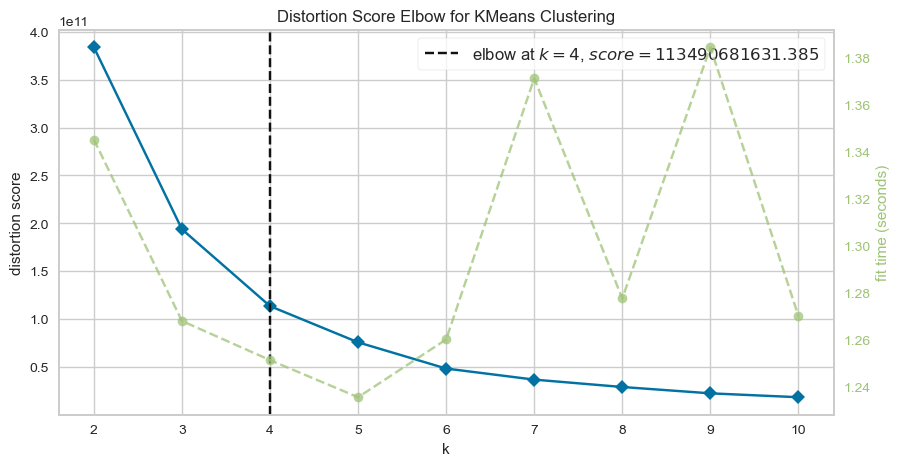

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(RFMT)
Elbow_M.show()

**Therefore K = 4**.

In [6]:
# Fitting KMeans Model

kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [7]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head()

,Customer ID,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
0,12346.000,325,12,745.700,33,0
1,12347.000,2,8,4921.530,50,0
2,12348.000,75,5,1991.860,72,0
3,12349.000,18,4,3786.500,142,0
4,12352.000,36,10,2098.940,35,0


# Evaluation

In [8]:
kmeans.cluster_centers_

array([[1.53159642e+04, 1.44706872e+02, 7.01753964e+00, 2.42744928e+03,
        7.00689572e+01],
       [1.63740000e+04, 5.00000000e-01, 1.48500000e+02, 5.22924278e+05,
        4.50000000e+00],
       [1.50282000e+04, 5.60000000e+00, 1.42900000e+02, 1.75188549e+05,
        7.10000000e+00],
       [1.50036173e+04, 3.28024691e+01, 5.45185185e+01, 3.60880413e+04,
        1.85308642e+01]])

In [9]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

<function matplotlib.pyplot.show(close=None, block=None)>

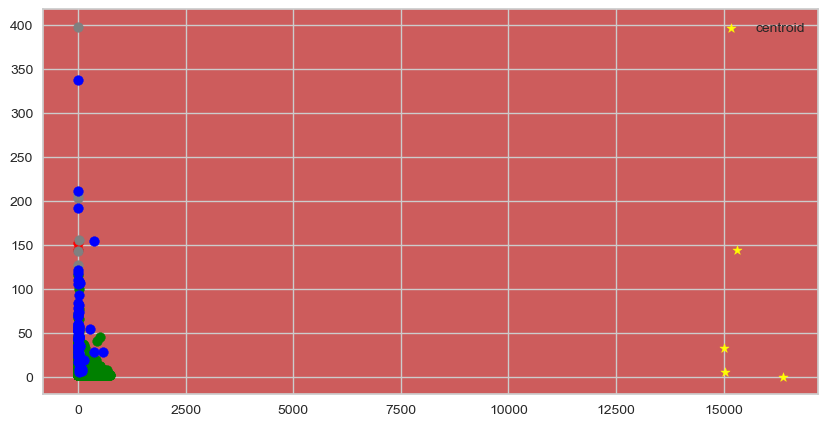

In [10]:
#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

*Silhouette Coefficient* or *silhouette score* is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. Score closer to 1, higher the cluster distinguished.

In [11]:
print("Silhouette score:",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

Silhouette score: 0.8710608365167134


In [12]:
print("Silhouette score:",silhouette_score(RFMT, kmeans.labels_, metric='manhattan'))

Silhouette score: 0.8483960165000729


In [13]:
print("Silhouette score:",silhouette_score(RFMT, kmeans.labels_, metric='minkowski'))

Silhouette score: 0.8710608365167134


In [14]:
print("Silhouette score:",silhouette_score(RFMT, kmeans.labels_, metric='chebyshev'))

Silhouette score: 0.8789551402448619
